# Coin Detection

**Name:** EASWAR R    **Reg. No:** 212223230053
**Slot:** 4E6-1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image=cv2.imread("CoinsA.png")

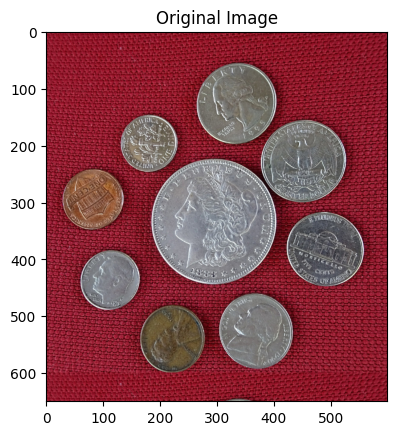

In [3]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()
# Expected output

# Convert Image to Grayscale

In [4]:
imageGray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

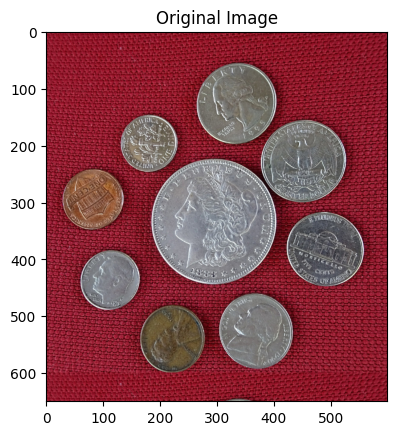

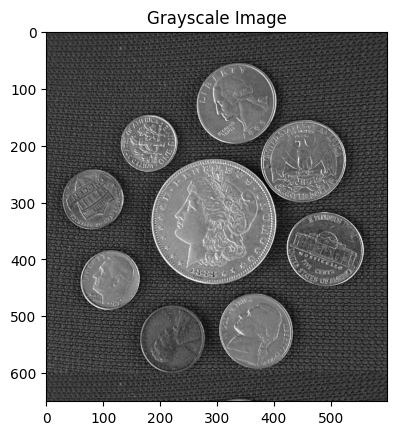

In [5]:
plt.imshow(image[:,:,::-1])
plt.title("Original Image")
plt.show()
plt.imshow(imageGray,cmap='gray')
plt.title("Grayscale Image")
plt.show()

# Split Image into R,G,B Channels

In [6]:
imageB, imageG, imageR = cv2.split(image)

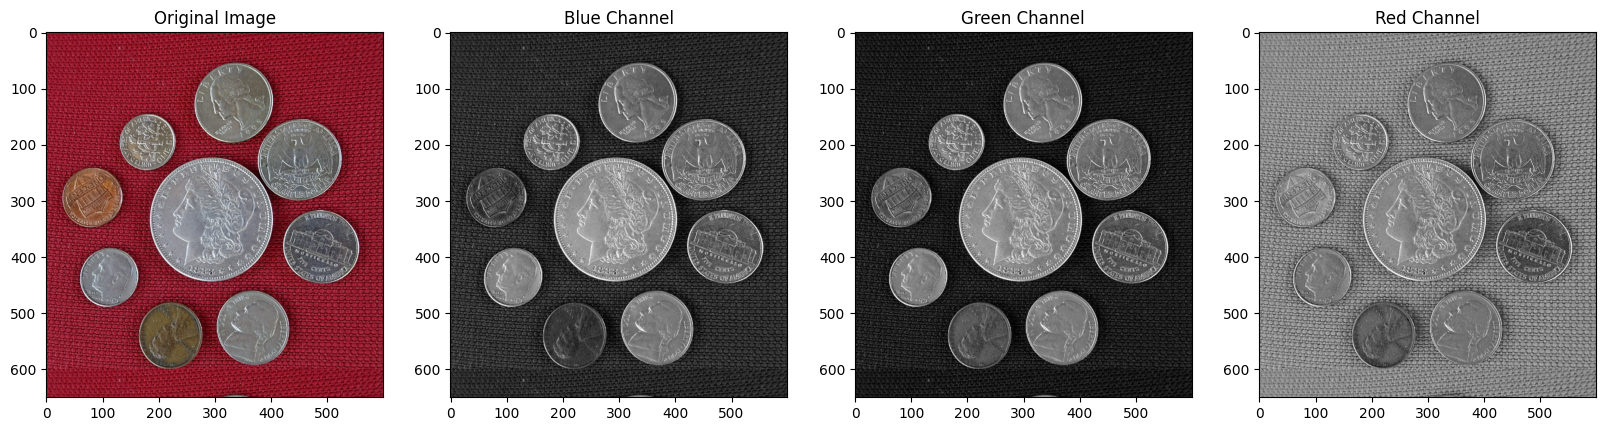

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()
# Expected output

# Perform Thresholding

In [8]:
_, thresh_inv = cv2.threshold(imageG, 20, 255, cv2.THRESH_BINARY_INV)

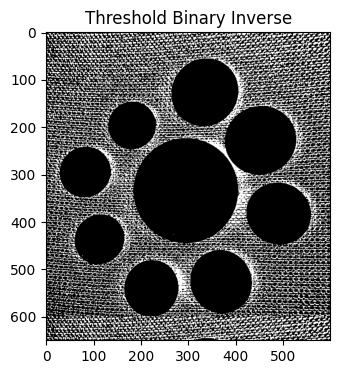

In [9]:
plt.figure(figsize=(4, 4))
plt.imshow(thresh_inv, cmap='gray')
plt.title("Threshold Binary Inverse")
plt.axis('on')  
plt.show()

# Perform morphological operations

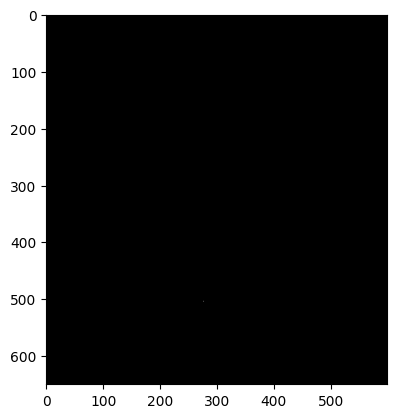

In [10]:
kernel = np.ones((5, 5), dtype=np.uint8)
eroded = cv2.erode(thresh_inv,kernel,iterations=2)
plt.imshow(eroded,cmap='gray')

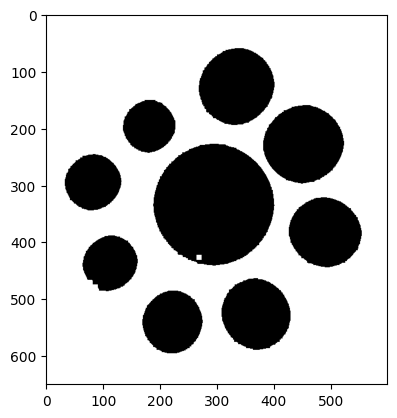

In [11]:
dilate = cv2.dilate(thresh_inv,kernel,iterations=2)
plt.imshow(dilate,cmap='gray')

#  Create SimpleBlobDetector

In [12]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [13]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

# Detect Coins

In [14]:
keypoints = detector.detect(dilate)

Number of coins detected: 9


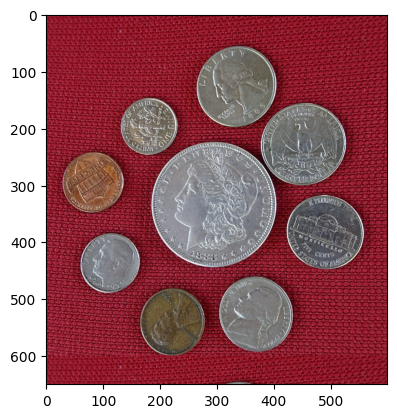

In [15]:
num_coins = len(keypoints)
print(f"Number of coins detected: {num_coins}")
plt.imshow(image[:,:,::-1]);